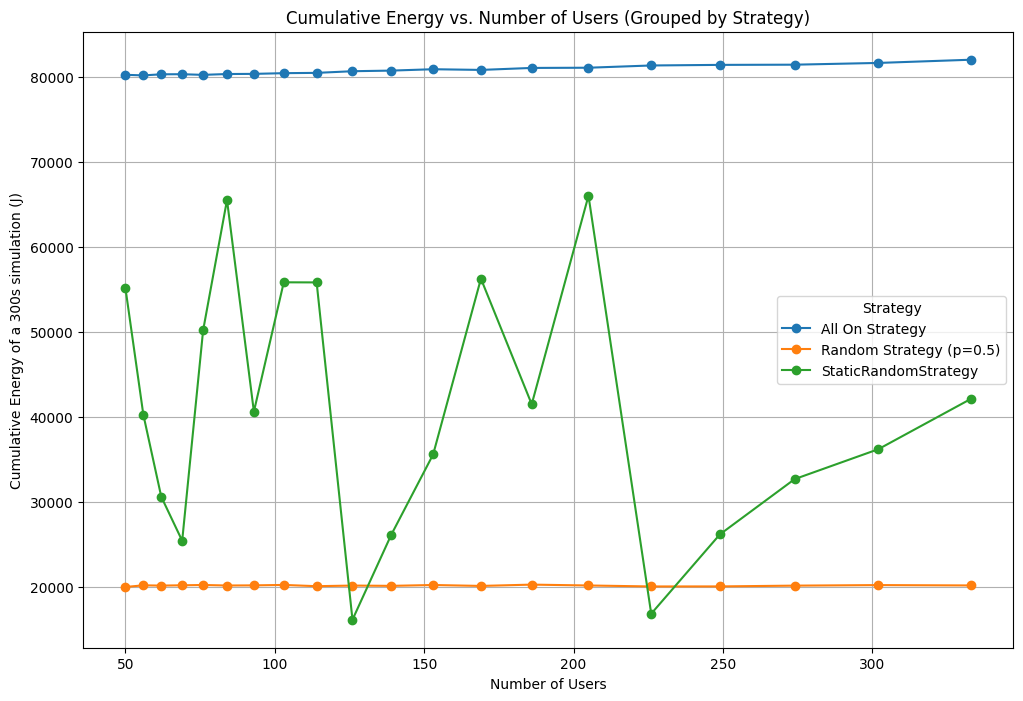

In [24]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import defaultdict

# Dictionary to hold dataframes grouped by strategy
dict_df = defaultdict(list)

# Read all energy history files
for file in glob.glob("../output/energy_history_*.csv"):
    # Extract strategy and user count from file name
    # Example filename: energy_history_All On Strategy_56.csv
    parts = file.split("_")
    strategy = parts[2]  # Strategy name
    user_count = int(parts[3].replace(".csv", ""))  # User count

    # Read the file into a DataFrame
    df = pd.read_csv(file)

    # Store the data grouped by strategy
    dict_df[strategy].append((user_count, df))

# Prepare the plot
plt.figure(figsize=(12, 8))

# Process each strategy
for strategy, data in dict_df.items():
    user_counts = []
    cumulative_energies = []

    # Process each file for the strategy
    for user_count, df in data:
        # Calculate the cumulative energy (sum of all nodes)
        cumulative_energy = df.sum().sum()
        user_counts.append(user_count)
        cumulative_energies.append(cumulative_energy)

    # Sort the data by user count
    sorted_data = sorted(zip(user_counts, cumulative_energies), key=lambda x: x[0])
    sorted_user_counts, sorted_cumulative_energies = zip(*sorted_data)

    # Plot the data for the current strategy
    plt.plot(
        sorted_user_counts,
        sorted_cumulative_energies,
        marker="o",
        linestyle="-",
        label=strategy,
    )

# Finalize the plot
plt.title("Cumulative Energy vs. Number of Users (Grouped by Strategy)")
plt.xlabel("Number of Users")
plt.ylabel("Cumulative Energy of a 300s simulation (J)")
plt.legend(title="Strategy")
plt.grid()
plt.show()